In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline
plt.style.use('fivethirtyeight')

df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv', parse_dates=['Date'])
df['Total Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


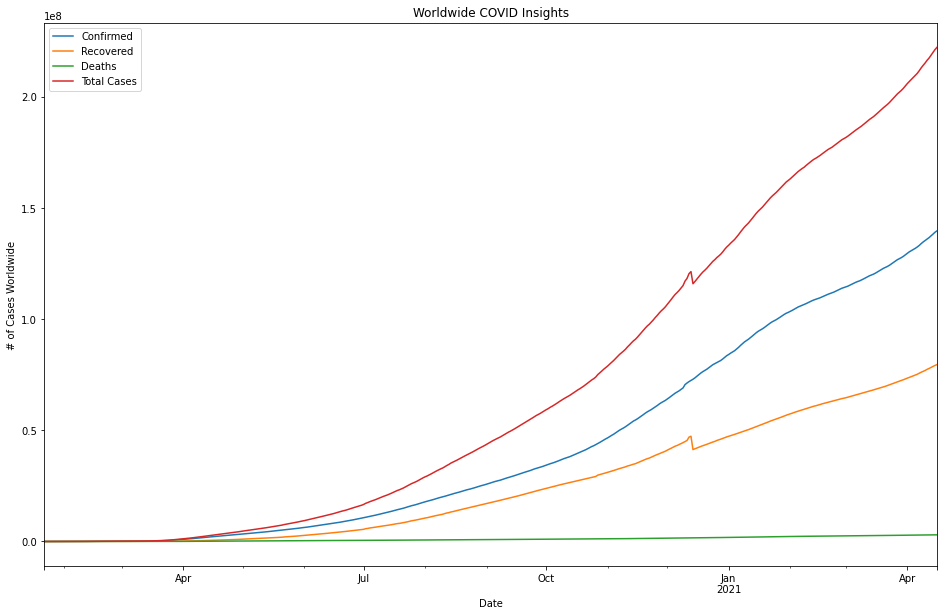

In [6]:
# Worldwide Cases

worldwide_df = df.groupby(['Date']).sum()
w = worldwide_df.plot(figsize=(8,5))
w.set_xlabel('Date')
w.set_ylabel('# of Cases Worldwide')
w.title.set_text('Worldwide COVID Insights')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

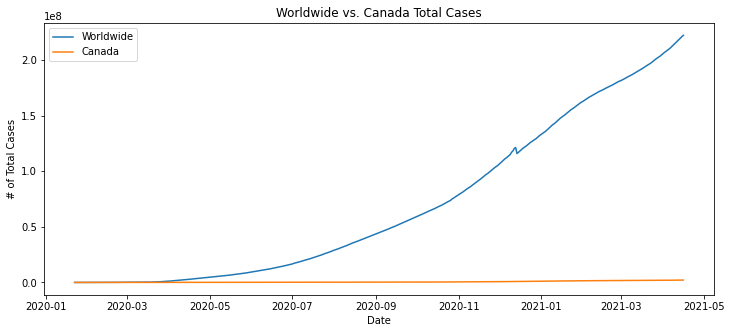

In [15]:
can_df = df[df['Country']=='Canada'].groupby(['Date']).sum()

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)

ax.plot(worldwide_df[['Total Cases']], label='Worldwide')
ax.plot(can_df[['Total Cases']], label='Canada')
ax.set_xlabel('Date')
ax.set_ylabel('# of Total Cases')
ax.title.set_text('Worldwide vs. Canada Total Cases')

plt.legend(loc='upper left')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

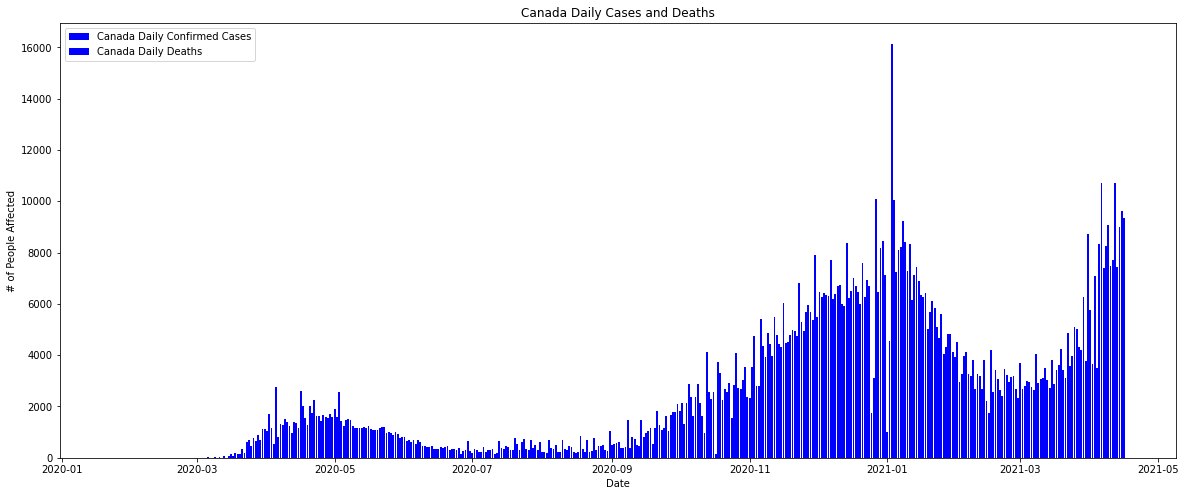

In [20]:
# Canada Daily Cases and Death
can_df['Daily Confirmed'] = can_df['Confirmed'].sub(can_df['Confirmed'].shift())
can_df['Daily Deaths'] = can_df['Deaths'].sub(can_df['Deaths'].shift())

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)

ax.bar(can_df['Date'], can_df['Daily Confirmed'], color='b', label='Canada Daily Confirmed Cases')
ax.bar(can_df['Date'], can_df['Daily Deaths'], color='r', label='Canada Daily Deaths')
ax.set_xlabel('Date')
ax.set_ylabel('# of People Affected')
ax.title.set_text('Canada Daily Cases and Deaths')

plt.legend(loc='upper left')
plt.show

<ipython-input-28-1dcc8b7c0c82>:13: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax.pie(top_10['Confirmed'], labels=top_10['Country'], autopct='%1.1f%%')


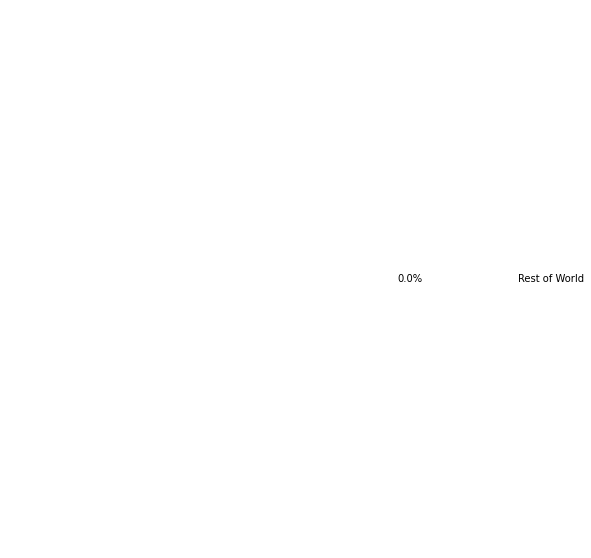

In [28]:
from datetime import date, timedelta
yesterday = date.today() - timedelta(days=1)
yesterday.strftime('%Y-%m-%d')

today_df = df[df['Date']==yesterday]
top_10 = today_df.sort_values(['Confirmed'], ascending=False)[:10]
top_10.loc['rest-of-world'] = today_df.sort_values(['Confirmed'], ascending=False)[10:].sum()
top_10.loc['rest-of-world', 'Country'] = 'Rest of World'

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.pie(top_10['Confirmed'], labels=top_10['Country'], autopct='%1.1f%%')
ax.title.set_text('Hardest Hit Countries Worldwide')

plt.legend(loc='upper left')
plt.show()